In [133]:
# --- 1. Setup & Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Pengaturan plot
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

In [134]:
# --- 2. Load Data ---
# Tentukan path file
SAMPLE_PATH = '../data/sample_small.csv'
PRODUCTS_PATH = '../data/raw/products.csv'

# Muat dataset
df_sales = pd.read_csv(SAMPLE_PATH, parse_dates=['date'])
df_products = pd.read_csv(PRODUCTS_PATH, parse_dates=['launch_date'])

print("Data Sampel Penjualan:")
display(df_sales.head())

print("\nData Master Produk:")
display(df_products.head())

Data Sampel Penjualan:


,transaction_id,date,product_id,region,channel,units_sold,avg_price,discount_pct,revenue,days_since_launch
0,4d3d0884-9090-452e-a328-b6fb73fb8445,2023-11-07,PC004,Yogyakarta,Hypermarket,5,23036.19,5,115180.97,920
1,5f4e083e-2f13-48ae-8edd-023039e4fdf1,2020-08-03,PC003,Denpasar,Tokopedia,7,28865.50,0,202058.52,136
2,2f74e58c-6477-4855-960b-d5e99a50d86b,2024-08-22,PC011,Bali,Shopee,3,36574.74,0,109724.23,865
3,a71eb6e9-1641-4992-9e4d-671563b9113c,2025-02-04,PC015,Palembang,Shopee,2,17780.43,0,35560.85,1526
4,8596ee0a-0637-4591-bf50-3cc4ab812349,2023-12-02,PC010,Palembang,Hypermarket,3,43936.33,0,131808.99,259



Data Master Produk:


,product_id,product_name,brand,type,size_ml,base_price,launch_date
0,PC001,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,340,32000,2020-02-15
1,PC002,Sunsilk Black Shine Conditioner 340ml,Sunsilk,Conditioner,340,33000,2020-06-10
2,PC003,Lifebuoy Total10 Body Wash 400ml,Lifebuoy,Body Wash,400,28000,2020-03-20
3,PC004,Lifebuoy Mild Care Handwash 200ml,Lifebuoy,Handwash,200,25000,2021-05-01
4,PC005,Dove Deep Moisture Lotion 200ml,Dove,Lotion,200,35000,2021-11-12


In [135]:
# --- 2b. Load & Proses Data Marketing ---
MARKETING_PATH = '../data/raw/marketing.csv'

# Muat data marketing
df_marketing = pd.read_csv(MARKETING_PATH)
print("\nData Marketing (Asli):")
display(df_marketing.head())

# Bersihkan nama kolom (hapus spasi & buat huruf kecil)
df_marketing.columns = df_marketing.columns.str.strip().str.lower()
print(f"Nama kolom baru: {df_marketing.columns.to_list()}")

# Agregasi: Hitung total spend per product_id
# (Kolom biaya ternyata 'spend_idr', bukan 'spend')
df_marketing_agg = df_marketing.groupby('product_id')['spend_idr'].sum().reset_index()

# Ubah nama kolom agar lebih jelas saat di-merge
df_marketing_agg = df_marketing_agg.rename(columns={'spend_idr': 'product_total_spend'})

print("\nData Marketing (Setelah Agregasi per Produk):")
display(df_marketing_agg.head())


Data Marketing (Asli):


,campaign_id,product_id,campaign_name,start_date,end_date,spend_idr,channel,engagement_rate
0,MKT001,PC010,Campaign_1_PC010,2020-10-12,2020-12-14,256411579,TV,0.566
1,MKT002,PC008,Campaign_2_PC008,2020-06-30,2020-08-29,582461991,TV,0.376
2,MKT003,PC006,Campaign_3_PC006,2021-09-01,2021-09-22,884233026,TV,0.117
3,MKT004,PC015,Campaign_4_PC015,2025-04-23,2025-07-04,1139498941,Influencer,0.560
4,MKT005,PC003,Campaign_5_PC003,2021-07-15,2021-09-08,340924224,Billboard,0.091


Nama kolom baru: ['campaign_id', 'product_id', 'campaign_name', 'start_date', 'end_date', 'spend_idr', 'channel', 'engagement_rate']

Data Marketing (Setelah Agregasi per Produk):


,product_id,product_total_spend
0,PC001,717751350
1,PC002,2323185153
2,PC003,340924224
3,PC004,2191606037
4,PC006,884233026


In [136]:
# --- 3. Merge Data ---

# 1. Gabungkan sales + products
df_merged_temp = pd.merge(
    df_sales, 
    df_products, 
    on='product_id', 
    how='left'
)

# 2. Gabungkan hasil di atas + marketing
df_merged = pd.merge(
    df_merged_temp,
    df_marketing_agg,
    on='product_id',
    how='left' 
)

# Isi produk yg tidak punya data marketing dengan 0
df_merged['product_total_spend'] = df_merged['product_total_spend'].fillna(0)


print("Data Gabungan (Sales + Products + Marketing):")
display(df_merged.head())

# Cek Dtypes dan nulls
print("\nInfo Data Gabungan:")
df_merged.info()

Data Gabungan (Sales + Products + Marketing):


,transaction_id,date,product_id,region,channel,units_sold,avg_price,discount_pct,revenue,days_since_launch,product_name,brand,type,size_ml,base_price,launch_date,product_total_spend
0,4d3d0884-9090-452e-a328-b6fb73fb8445,2023-11-07,PC004,Yogyakarta,Hypermarket,5,23036.19,5,115180.97,920,Lifebuoy Mild Care Handwash 200ml,Lifebuoy,Handwash,200,25000,2021-05-01,2.191606e+09
1,5f4e083e-2f13-48ae-8edd-023039e4fdf1,2020-08-03,PC003,Denpasar,Tokopedia,7,28865.50,0,202058.52,136,Lifebuoy Total10 Body Wash 400ml,Lifebuoy,Body Wash,400,28000,2020-03-20,3.409242e+08
2,2f74e58c-6477-4855-960b-d5e99a50d86b,2024-08-22,PC011,Bali,Shopee,3,36574.74,0,109724.23,865,Ponds Bright Beauty Facial Foam 100g,Ponds,Facial Foam,100,35000,2022-04-10,1.605984e+09
3,a71eb6e9-1641-4992-9e4d-671563b9113c,2025-02-04,PC015,Palembang,Shopee,2,17780.43,0,35560.85,1526,Lifebuoy Hand Sanitizer Gel 50ml,Lifebuoy,Sanitizer,50,18000,2020-12-01,1.440970e+09
4,8596ee0a-0637-4591-bf50-3cc4ab812349,2023-12-02,PC010,Palembang,Hypermarket,3,43936.33,0,131808.99,259,Love Beauty & Planet Coconut Water Shampoo 400ml,Love Beauty & Planet,Shampoo,400,42000,2023-03-18,1.305635e+09



Info Data Gabungan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   transaction_id       10000 non-null  object        
 1   date                 10000 non-null  datetime64[ns]
 2   product_id           10000 non-null  object        
 3   region               10000 non-null  object        
 4   channel              10000 non-null  object        
 5   units_sold           10000 non-null  int64         
 6   avg_price            10000 non-null  float64       
 7   discount_pct         10000 non-null  int64         
 8   revenue              10000 non-null  float64       
 9   days_since_launch    10000 non-null  int64         
 10  product_name         10000 non-null  object        
 11  brand                10000 non-null  object        
 12  type                 10000 non-null  object        
 13  size_ml    

--- 1. Cek Missing Values (Sebelum) ---
transaction_id         0
date                   0
product_id             0
region                 0
channel                0
units_sold             0
avg_price              0
discount_pct           0
revenue                0
days_since_launch      0
product_name           0
brand                  0
type                   0
size_ml                0
base_price             0
launch_date            0
product_total_spend    0
dtype: int64

Baris dihapus (product_id tidak ditemukan): 0

--- 1. Cek Missing Values (Sesudah) ---
transaction_id         0
date                   0
product_id             0
region                 0
channel                0
units_sold             0
avg_price              0
discount_pct           0
revenue                0
days_since_launch      0
product_name           0
brand                  0
type                   0
size_ml                0
base_price             0
launch_date            0
product_total_spend    0
dtype: in

,units_sold,avg_price,revenue
count,10000.0000,10000.000000,10000.000000
mean,4.0189,30344.417535,122096.583817
std,1.7257,5913.329771,58765.831054
min,1.0000,13290.400000,14223.070000
25%,3.0000,26888.612500,78676.167500
50%,4.0000,30783.015000,114557.290000
75%,5.0000,34212.250000,156611.707500
max,13.0000,44086.120000,472895.530000


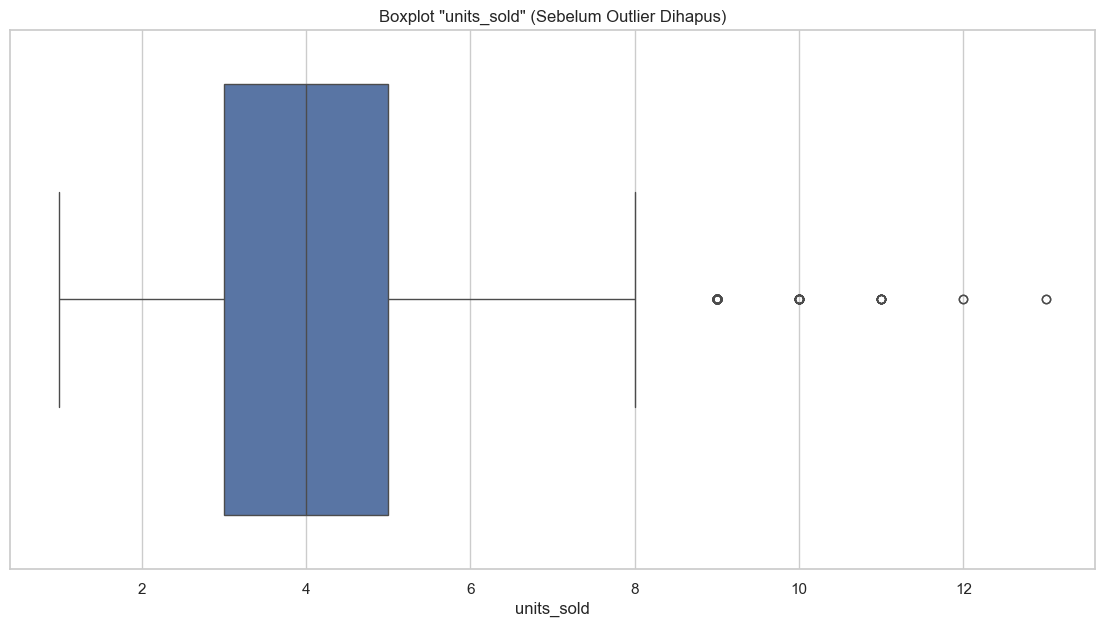

Outlier 'units_sold' (di luar 0.0 - 8.0) dihapus: 128 baris

Statistik Deskriptif (Setelah Outlier Dihapus):


,units_sold,avg_price,revenue
count,9872.000000,9872.000000,9872.000000
mean,3.948845,30339.247003,119918.828899
std,1.620054,5907.252144,55408.351888
min,1.000000,13290.400000,14223.070000
25%,3.000000,26879.792500,78128.947500
50%,4.000000,30782.035000,113451.430000
75%,5.000000,34207.830000,154842.657500
max,8.000000,44086.120000,330028.310000


In [137]:
# --- 4. Data Cleaning ---

### 1. Penanganan Missing Values
print("--- 1. Cek Missing Values (Sebelum) ---")
print(df_merged.isnull().sum())

# discount_pct: Asumsi NaN = 0% diskon
df_merged['discount_pct'] = df_merged['discount_pct'].fillna(0)

# product_name: Hapus baris jika product_id tidak ada di products.csv (product_name jadi null)
initial_rows = len(df_merged)
df_merged.dropna(subset=['product_name'], inplace=True)
rows_dropped = initial_rows - len(df_merged)
print(f"\nBaris dihapus (product_id tidak ditemukan): {rows_dropped}")


print("\n--- 1. Cek Missing Values (Sesudah) ---")
print(df_merged.isnull().sum())


### 2. Penanganan Duplikat
# Cek duplikat berdasarkan transaction_id
initial_rows = len(df_merged)
df_merged.drop_duplicates(subset=['transaction_id'], keep='first', inplace=True)
rows_dropped = initial_rows - len(df_merged)

print(f"\n--- 2. Penanganan Duplikat ---")
print(f"Baris duplikat (transaction_id) dihapus: {rows_dropped}")


### 3. Penanganan Outlier
print(f"\n--- 3. Penanganan Outlier ('units_sold') ---")
print("\nStatistik Deskriptif (Sebelum Outlier Dihapus):")
display(df_merged[['units_sold', 'avg_price', 'revenue']].describe())

# Visualisasikan outlier
plt.title('Boxplot "units_sold" (Sebelum Outlier Dihapus)')
sns.boxplot(x=df_merged['units_sold'])
plt.show()

# Hapus outlier 'units_sold' menggunakan metode IQR
Q1 = df_merged['units_sold'].quantile(0.25)
Q3 = df_merged['units_sold'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Simpan data yang 'normal' (di dalam batas IQR)
initial_rows = len(df_merged)
df_merged = df_merged[
    (df_merged['units_sold'] >= lower_bound) & 
    (df_merged['units_sold'] <= upper_bound)
]
rows_dropped = initial_rows - len(df_merged)

print(f"Outlier 'units_sold' (di luar {lower_bound:.1f} - {upper_bound:.1f}) dihapus: {rows_dropped} baris")
print("\nStatistik Deskriptif (Setelah Outlier Dihapus):")
display(df_merged[['units_sold', 'avg_price', 'revenue']].describe())

/var/folders/9k/f37gy0js2qjbmy0hs9j_k21c0000gn/T/ipykernel_76452/2871689068.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_sales = df_merged.groupby(pd.Grouper(key='date', freq='M'))['revenue'].sum().reset_index()


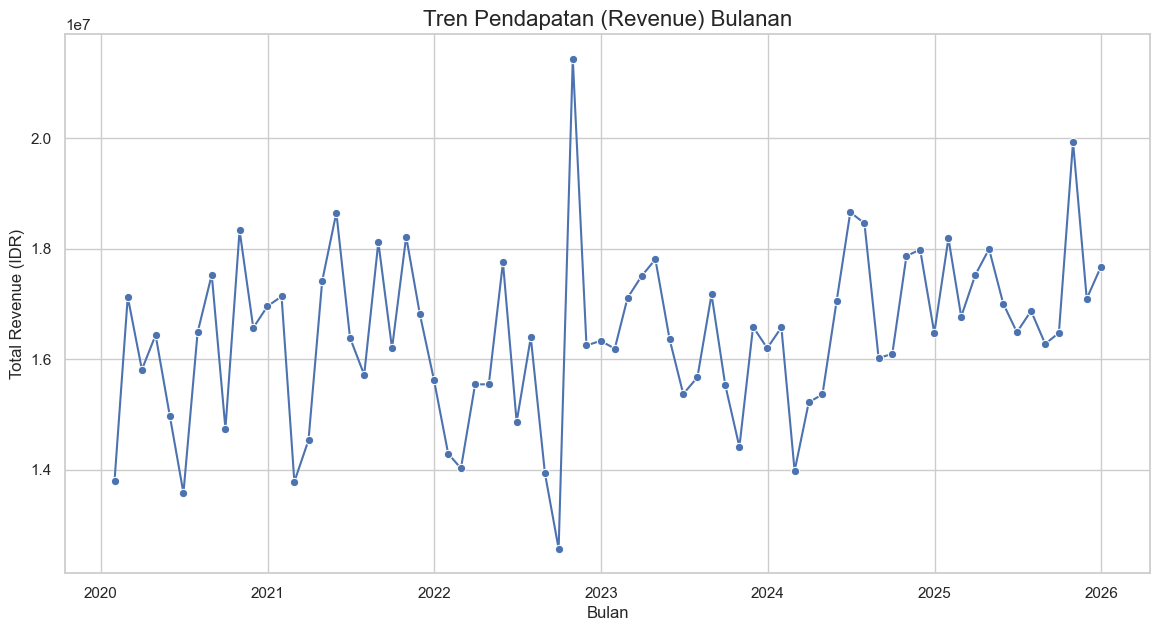

In [138]:
# --- 5. EDA: Tren Pendapatan Bulanan ---
# Agregasi per bulan (M) dan jumlahkan revenue
df_monthly_sales = df_merged.groupby(pd.Grouper(key='date', freq='M'))['revenue'].sum().reset_index()

plt.title('Tren Pendapatan (Revenue) Bulanan', fontsize=16)
sns.lineplot(data=df_monthly_sales, x='date', y='revenue', marker='o')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue (IDR)')
plt.show()

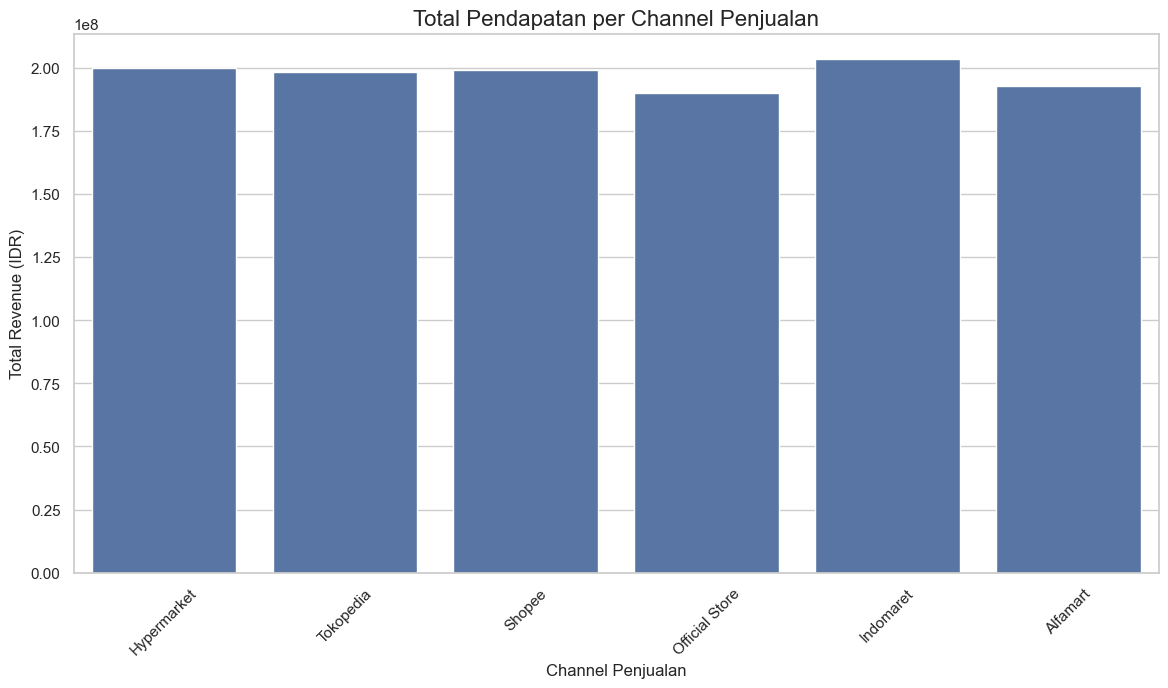

In [139]:
# --- 6. EDA: Pendapatan per Channel ---
plt.title('Total Pendapatan per Channel Penjualan', fontsize=16)
sns.barplot(data=df_merged, x='channel', y='revenue', estimator='sum', errorbar=None)
plt.xlabel('Channel Penjualan')
plt.ylabel('Total Revenue (IDR)')
plt.xticks(rotation=45)
plt.show()

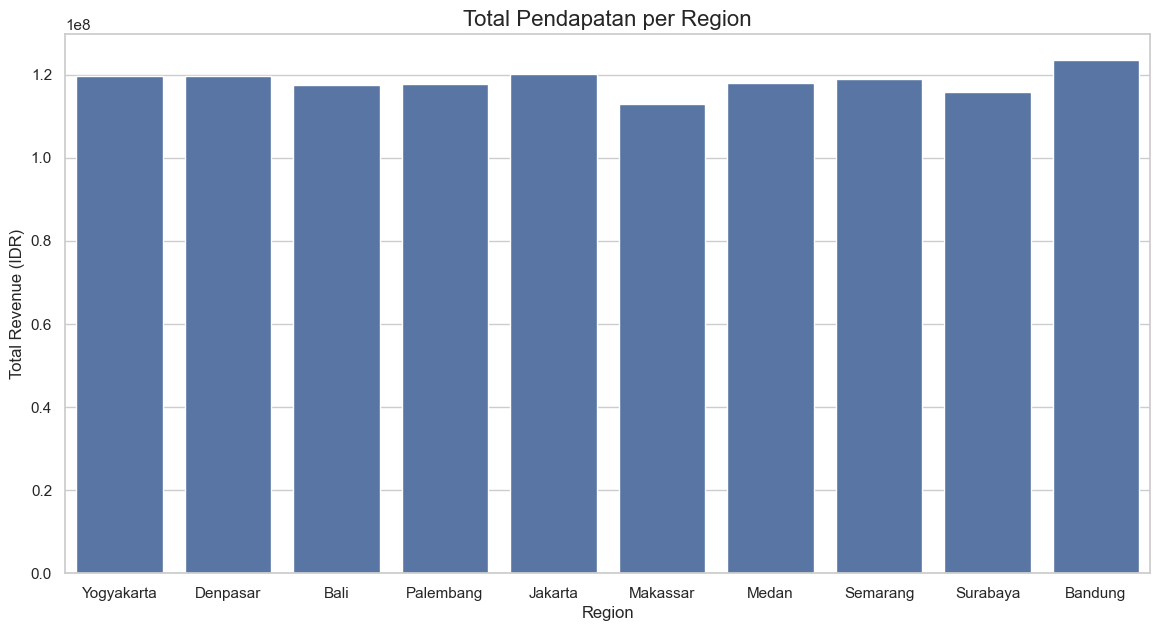

In [140]:
# --- 7. EDA: Pendapatan per Region ---
plt.title('Total Pendapatan per Region', fontsize=16)
sns.barplot(data=df_merged, x='region', y='revenue', estimator='sum', errorbar=None)
plt.xlabel('Region')
plt.ylabel('Total Revenue (IDR)')
plt.show()

In [141]:
# --- 8. Feature Engineering ---

# 1. Fitur berbasis Waktu
df_merged['sale_year'] = df_merged['date'].dt.year
df_merged['sale_month'] = df_merged['date'].dt.month
df_merged['sale_day_of_week'] = df_merged['date'].dt.dayofweek
df_merged['sale_is_weekend'] = (df_merged['sale_day_of_week'] >= 5).astype(int)

# 2. Fitur berbasis Umur Produk
# Kategorikan 'days_since_launch'
def categorize_age(days):
    if days < 0: return 'Pre-Launch'
    if days <= 90: return 'New Launch'
    if days <= 365: return 'Established'
    else: return 'Mature'

df_merged['product_age_category'] = df_merged['days_since_launch'].apply(categorize_age)

print("\nData dengan Fitur Baru:")
display(df_merged[['date', 'product_name', 'days_since_launch', 'product_age_category']].head())


Data dengan Fitur Baru:


,date,product_name,days_since_launch,product_age_category
0,2023-11-07,Lifebuoy Mild Care Handwash 200ml,920,Mature
1,2020-08-03,Lifebuoy Total10 Body Wash 400ml,136,Established
2,2024-08-22,Ponds Bright Beauty Facial Foam 100g,865,Mature
3,2025-02-04,Lifebuoy Hand Sanitizer Gel 50ml,1526,Mature
4,2023-12-02,Love Beauty & Planet Coconut Water Shampoo 400ml,259,Established


In [142]:
# --- 9. Persiapan & Training Model ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder

### 9.1 Persiapan Data
# Pilih fitur untuk model (tambahkan 'product_total_spend')
df_model = df_merged[['revenue', 'units_sold', 'discount_pct', 'days_since_launch', 
                    'region', 'channel', 'brand', 'type', 'product_age_category',
                    'product_total_spend']].dropna()

# Definisikan fitur kategorikal & numerik (tambahkan 'product_total_spend')
categorical_features = ['region', 'channel', 'brand', 'type', 'product_age_category']
numerical_features = ['units_sold', 'discount_pct', 'days_since_launch', 'product_total_spend']

# One-hot encode fitur kategorikal
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(df_model[categorical_features])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out())

# Gabungkan fitur numerik dan hasil encode ke X
X = pd.concat([df_model[numerical_features].reset_index(drop=True), encoded_cats_df], axis=1)
y = df_model['revenue'].reset_index(drop=True)

### 9.2 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 9.3 Latih Model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Selesai Dilatih.")


Model Selesai Dilatih.


In [143]:
# --- 10. Evaluasi Model ---
# Prediksi di test set
preds = model.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, preds)

print(f"--- Hasil Evaluasi Model ---")
print(f"MSE  (Mean Squared Error):         {mse:.2f}")
print(f"RMSE (Root Mean Squared Error):   {rmse:.2f}")
print(f"MAPE (Mean Abs. Pct. Error):    {mape:.2%}")

--- Hasil Evaluasi Model ---
MSE  (Mean Squared Error):         119721085.26
RMSE (Root Mean Squared Error):   10941.71
MAPE (Mean Abs. Pct. Error):    9.46%
